In [15]:
import pandas as pd
import numpy as np
from scipy.stats import spearmanr
from scipy.stats import shapiro
from scipy.stats import friedmanchisquare
from scipy.stats import wilcoxon
import itertools
import matplotlib.pyplot as plt
import os

In [16]:
file_path = "./Cronbach_alpha_computation_template.xlsx"

In [17]:
sheet_config = {
    "Autonomy": {
        "sheet": "Autonomy answers",
        "n_items": 3
    },
    "Competence": {
        "sheet": "Competence answers",
        "n_items": 4
    },
    "Relatedness": {
        "sheet": "Relatedness answers",
        "n_items": 3
    }
}


In [18]:
data = {}

In [19]:
for scale, cfg in sheet_config.items():
    df = pd.read_excel(file_path, sheet_name=cfg["sheet"])
    df = df.iloc[:, :cfg["n_items"]]  # enforce item count
    data[scale] = df

In [20]:
def cronbach_alpha(df):
    """
    Cronbach's alpha for Likert-scale questionnaire data
    Rows = participants, Columns = items
    """
    df = df.dropna()
    item_variances = df.var(axis=0, ddof=1)
    total_variance = df.sum(axis=1).var(ddof=1)
    k = df.shape[1]

    alpha = (k / (k - 1)) * (1 - item_variances.sum() / total_variance)
    return alpha

In [21]:
def corrected_item_total_corr(df):
    """
    Spearman corrected item–total correlations
    """
    correlations = {}
    for item in df.columns:
        item_scores = df[item]
        total_minus_item = df.drop(columns=item).sum(axis=1)
        corr, _ = spearmanr(item_scores, total_minus_item)
        correlations[item] = corr
    return pd.Series(correlations, name="Item–Total Correlation")


In [22]:
results = {}

for scale, df in data.items():
    alpha = cronbach_alpha(df)
    item_var = df.var(axis=0, ddof=1)
    item_total = corrected_item_total_corr(df)

    table = pd.DataFrame({
        "Item Variance": item_var,
        "Corrected Item–Total Correlation": item_total
    })

    results[scale] = {
        "alpha": alpha,
        "table": table
    }

    print(f"\n📊 {scale}")
    print(f"Cronbach's alpha (α): {alpha:.3f}")
    display(table)



📊 Autonomy
Cronbach's alpha (α): 0.831


,Item Variance,Corrected Item–Total Correlation
A1. I felt free to make my own choices while playing the games.,0.082828,0.525510
A2. I felt that I could play the games in my own way.,0.431313,0.898421
A3. I felt in control of my actions during the games.,0.336364,0.920494



📊 Competence
Cronbach's alpha (α): 0.951


,Item Variance,Corrected Item–Total Correlation
C1. I felt capable of completing the tasks in the games.,0.472727,0.859263
C2. The games helped me feel more confident about my digital skills.,0.373737,0.893443
C3. I felt successful when progressing through the games activities.,0.446465,0.793460
C4. The difficulty of the games tasks was appropriate for me.,0.537374,0.899921



📊 Relatedness
Cronbach's alpha (α): 0.727


,Item Variance,Corrected Item–Total Correlation
R1. I enjoyed interacting with other participants during the games.,0.188889,0.582162
R2. I felt supported by the trainer and other players.,0.082828,0.479784
R3. Playing the games made me feel connected to others.,0.325253,0.537784


In [23]:
for scale, df in data.items():
    print(f"\n📈 Descriptive statistics for {scale}")
    display(df.describe().T[["mean", "std", "min", "max"]])



📈 Descriptive statistics for Autonomy


,mean,std,min,max
A1. I felt free to make my own choices while playing the games.,4.911111,0.287799,4.0,5.0
A2. I felt that I could play the games in my own way.,3.977778,0.656744,3.0,5.0
A3. I felt in control of my actions during the games.,4.066667,0.579969,3.0,5.0



📈 Descriptive statistics for Competence


,mean,std,min,max
C1. I felt capable of completing the tasks in the games.,3.933333,0.687552,2.0,5.0
C2. The games helped me feel more confident about my digital skills.,3.888889,0.611341,3.0,5.0
C3. I felt successful when progressing through the games activities.,3.688889,0.668180,2.0,5.0
C4. The difficulty of the games tasks was appropriate for me.,3.911111,0.733058,2.0,5.0



📈 Descriptive statistics for Relatedness


,mean,std,min,max
R1. I enjoyed interacting with other participants during the games.,4.755556,0.434613,4.0,5.0
R2. I felt supported by the trainer and other players.,4.911111,0.287799,4.0,5.0
R3. Playing the games made me feel connected to others.,4.355556,0.570309,3.0,5.0


In [24]:
def interpret_alpha(alpha):
    if alpha >= 0.90:
        return "Excellent"
    elif alpha >= 0.80:
        return "Good"
    elif alpha >= 0.70:
        return "Acceptable"
    elif alpha >= 0.60:
        return "Questionable"
    else:
        return "Poor"

for scale in results:
    alpha = results[scale]["alpha"]
    print(f"{scale}: α = {alpha:.2f} ({interpret_alpha(alpha)})")


Autonomy: α = 0.83 (Good)
Competence: α = 0.95 (Excellent)
Relatedness: α = 0.73 (Acceptable)


In [25]:
total_scores = {}

for scale, df in data.items():
    total_scores[scale] = df.sum(axis=1)


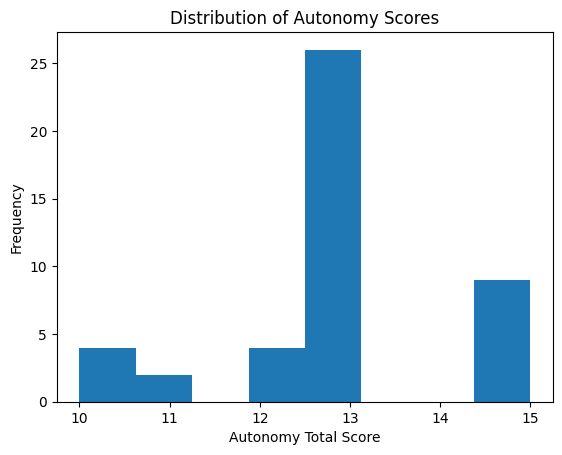

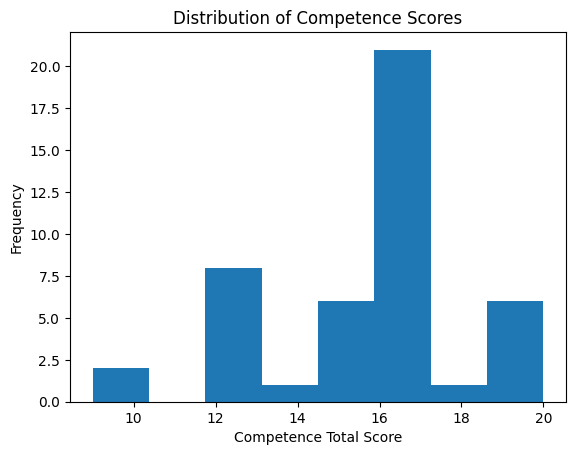

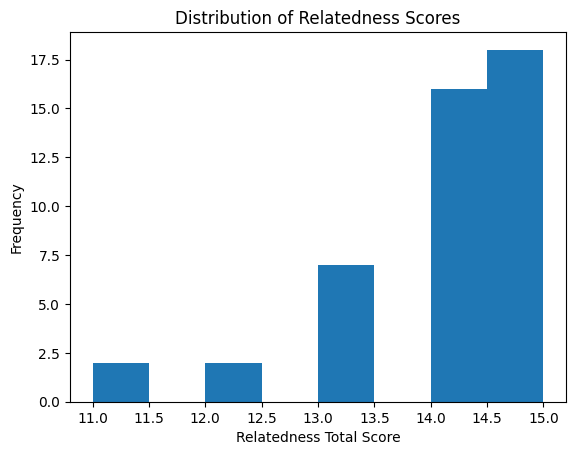

In [26]:
for scale, scores in total_scores.items():
    plt.figure()
    plt.hist(scores, bins=8)
    plt.xlabel(f"{scale} Total Score")
    plt.ylabel("Frequency")
    plt.title(f"Distribution of {scale} Scores")
    plt.show()


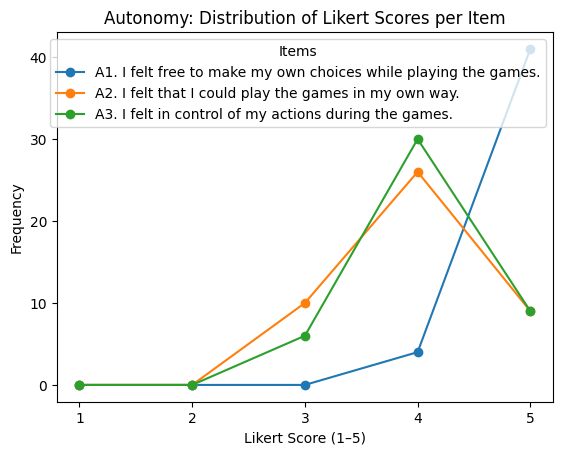

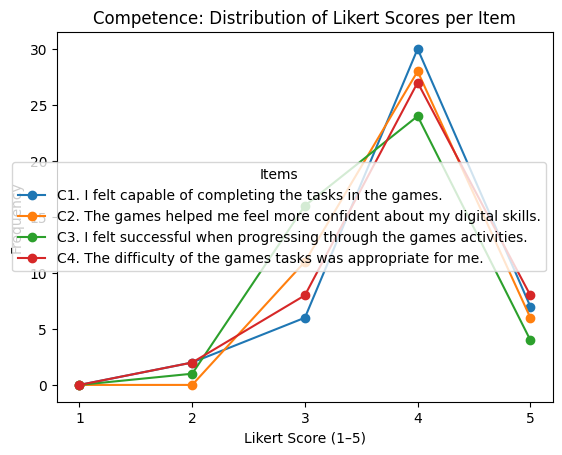

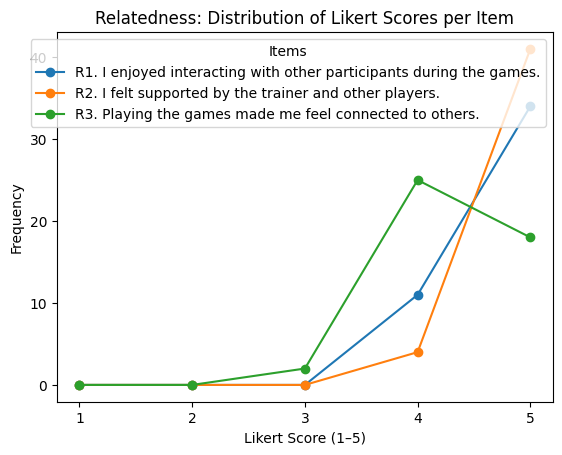

In [27]:
likert_values = [1, 2, 3, 4, 5]

for scale, df in data.items():
    plt.figure()

    for item in df.columns:
        counts = df[item].value_counts().reindex(likert_values, fill_value=0)
        plt.plot(likert_values, counts, marker='o', label=item)

    plt.xlabel("Likert Score (1–5)")
    plt.ylabel("Frequency")
    plt.title(f"{scale}: Distribution of Likert Scores per Item")
    plt.xticks(likert_values)
    plt.legend(title="Items")
    plt.show()


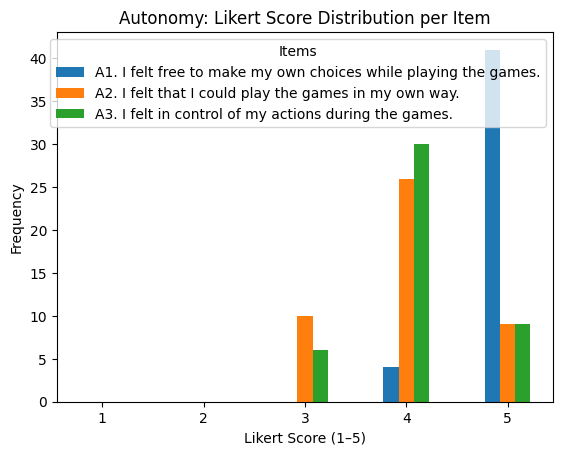

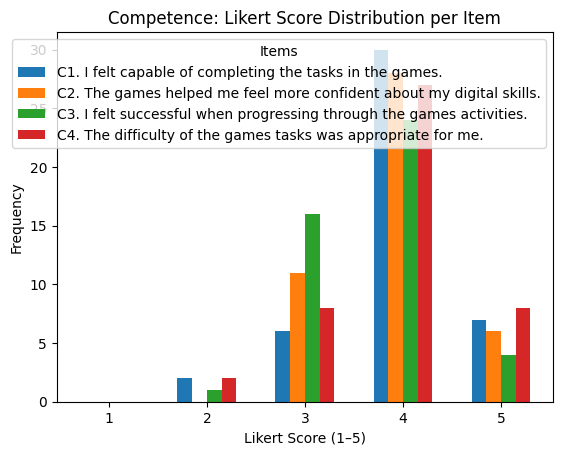

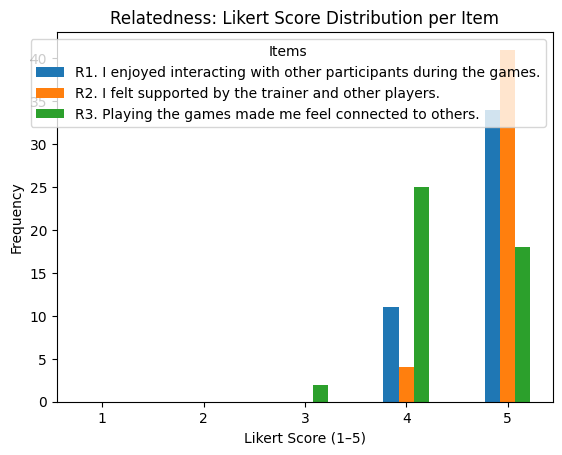

In [28]:
for scale, df in data.items():
    plt.figure()
    x = np.arange(len(likert_values))
    width = 0.15

    for i, item in enumerate(df.columns):
        counts = df[item].value_counts().reindex(likert_values, fill_value=0)
        plt.bar(x + i * width, counts, width=width, label=item)

    plt.xlabel("Likert Score (1–5)")
    plt.ylabel("Frequency")
    plt.title(f"{scale}: Likert Score Distribution per Item")
    plt.xticks(x + width * (len(df.columns) - 1) / 2, likert_values)
    plt.legend(title="Items")
    plt.show()


In [29]:
for scale, scores in total_scores.items():
    stat, p = shapiro(scores)
    print(f"{scale} — Shapiro–Wilk W={stat:.3f}, p={p:.4f}")

Autonomy — Shapiro–Wilk W=0.819, p=0.0000
Competence — Shapiro–Wilk W=0.903, p=0.0011
Relatedness — Shapiro–Wilk W=0.809, p=0.0000


In [30]:
stat, p = friedmanchisquare(
    total_scores["Autonomy"],
    total_scores["Competence"],
    total_scores["Relatedness"]
)

print(f"Friedman χ²={stat:.3f}, p={p:.4f}")

Friedman χ²=63.939, p=0.0000


In [31]:
pairs = list(itertools.combinations(total_scores.keys(), 2))

for a, b in pairs:
    stat, p = wilcoxon(total_scores[a], total_scores[b])
    p_adj = p * len(pairs)  # Bonferroni correction
    print(f"{a} vs {b}: p={p:.4f}, p_adj={p_adj:.4f}")

Autonomy vs Competence: p=0.0000, p_adj=0.0000
Autonomy vs Relatedness: p=0.0000, p_adj=0.0000
Competence vs Relatedness: p=0.0000, p_adj=0.0000


In [32]:
def cliffs_delta(x, y):
    """
    Compute Cliff's delta effect size
    """
    nx, ny = len(x), len(y)
    greater = sum(1 for xi in x for yi in y if xi > yi)
    less = sum(1 for xi in x for yi in y if xi < yi)
    delta = (greater - less) / (nx * ny)
    return delta

In [33]:
delta = cliffs_delta(
    total_scores["Autonomy"],
    total_scores["Competence"]
)

print(f"Cliff’s δ (Autonomy vs Competence) = {delta:.3f}")


Cliff’s δ (Autonomy vs Competence) = -0.615


In [34]:
def interpret_delta(delta):
    ad = abs(delta)
    if ad < 0.147:
        return "negligible"
    elif ad < 0.33:
        return "small"
    elif ad < 0.474:
        return "medium"
    else:
        return "large"

print(f"Effect size interpretation: {interpret_delta(delta)}")


Effect size interpretation: large


In [35]:
delta_aut_rel = cliffs_delta(
    total_scores["Autonomy"],
    total_scores["Relatedness"]
)

delta_comp_rel = cliffs_delta(
    total_scores["Competence"],
    total_scores["Relatedness"]
)

print(f"Cliff’s δ (Autonomy vs Relatedness) = {delta_aut_rel:.3f}")
print(f"Cliff’s δ (Competence vs Relatedness) = {delta_comp_rel:.3f}")


Cliff’s δ (Autonomy vs Relatedness) = -0.474
Cliff’s δ (Competence vs Relatedness) = 0.509


In [36]:
print(f"Effect size interpretation: {interpret_delta(delta)}")

Effect size interpretation: large
